In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

from IPython.display import Image

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [8]:
import json

n_authors_fileDir = "datasets/n_authors_per_paper.json"
institution_fileDir = "datasets/institution_dataset.json"
authors_fileDir = "datasets/authors_dataset.json"

In [25]:
with open(n_authors_fileDir) as handle:
    n_authors_per_paper = json.loads(handle.read())

trace0 = go.Bar(
            x = [x[0] for x in n_authors_per_paper],
            y = [y[1] for y in n_authors_per_paper],
            text=[y[1] for y in n_authors_per_paper],
            textposition = 'auto',
            name='Number of authors per paper',
            marker=dict(
                color='rgb(49,130,189)'
            )
    )

data = [trace0]


layout = go.Layout(
    title=go.layout.Title(
        text='Number of Authors per Paper',
#         xref='paper'
    ),
    xaxis=go.layout.XAxis(
        tickangle=0,
        title=go.layout.xaxis.Title(
            text='Number of authors',
            font=dict(
#                 family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Papers with N Authors',
            font=dict(
#                 family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

init_notebook_mode(connected=True)

fig = go.Figure(data=data, layout=layout)

static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

pio.write_image(fig, file='images/authors_per_paper.png', format='png')

In [31]:
with open(authors_fileDir) as handle:
    authors_dataset = json.loads(handle.read())
    
print(authors_dataset[:50][0])

['Michael Jordan', 7]


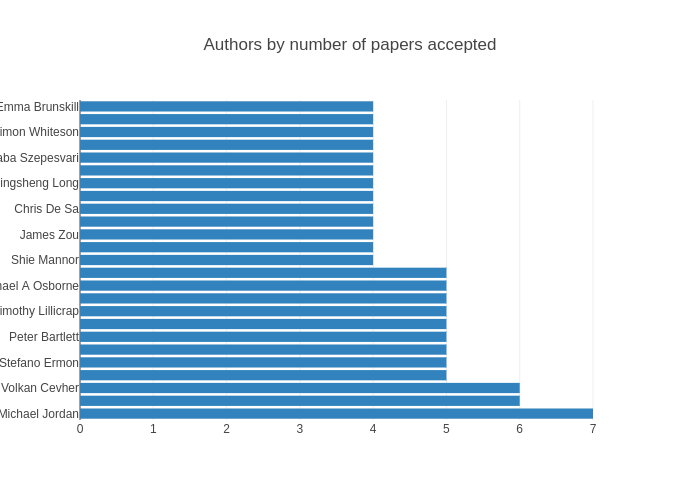

In [41]:
# Tried on plotly to make an horizontal bar chart but I found that is easier to do on matplotlib

trace0 = go.Bar(
    x= [x[1] for x in authors_dataset[:25]],
    y= [x[0] for x in authors_dataset[:25]],
    orientation = 'h',
#     text=nAcceptanceRates,
#     textposition = 'auto',
    name='Authors by number of papers accepted',
    marker=dict(
        color='rgb(49,130,189)',
    )
)

data = [trace0]
layout = go.Layout(
    title=go.layout.Title(
        text='Authors by number of papers accepted',
    ),
    xaxis=go.layout.XAxis(
    tickangle=0,
    title=go.layout.xaxis.Title(
        font=dict(
#                 family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    )),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            font=dict(
#                 family='Courier New, monospace',
                size=5,
                color='#7f7f7f'
            )
        )
    )
)

init_notebook_mode(connected=True)

fig = go.Figure(data=data, layout=layout)
static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

# pio.write_image(fig, file='acceptance_rate.png', format='png')

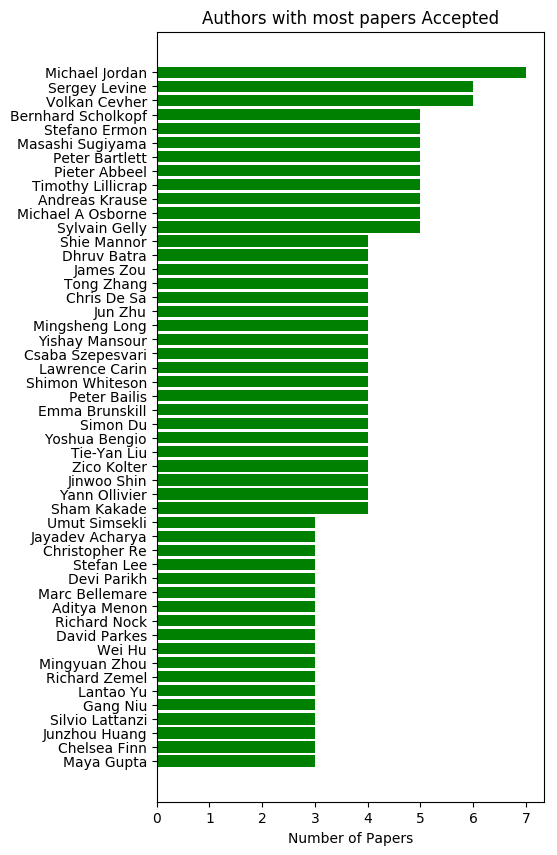

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(5, 10))

nTop = 50

nPapers = [x[0] for x in authors_dataset[:nTop]]
people = [x[1] for x in authors_dataset[:nTop]]
error = np.random.rand(len(people))

ax.barh(nPapers, people, align='center',
        color='green', ecolor='black')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Papers')
ax.set_title('Authors with most papers Accepted')

# plt.show()
plt.savefig('authors_rank_by_accepted_papers.png', bbox_inches='tight')
